c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


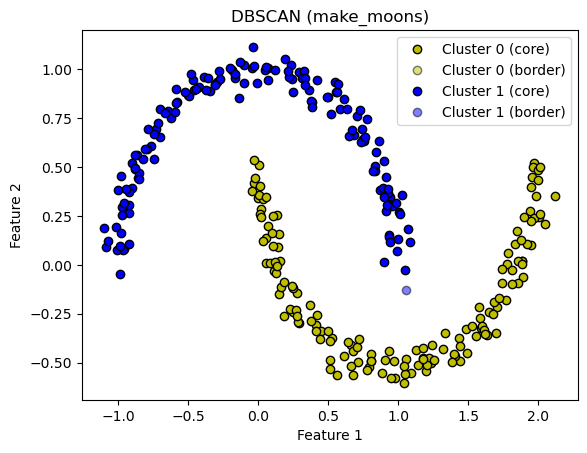

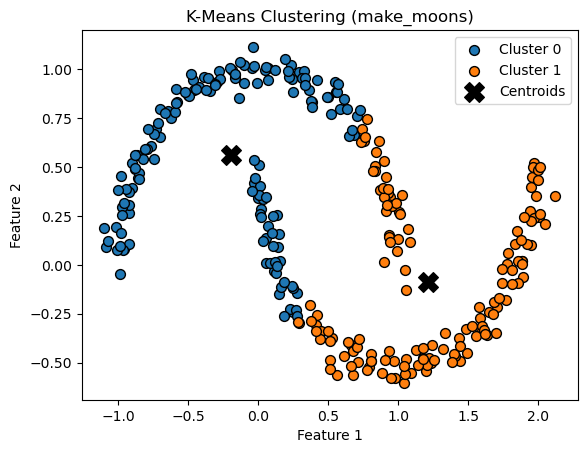

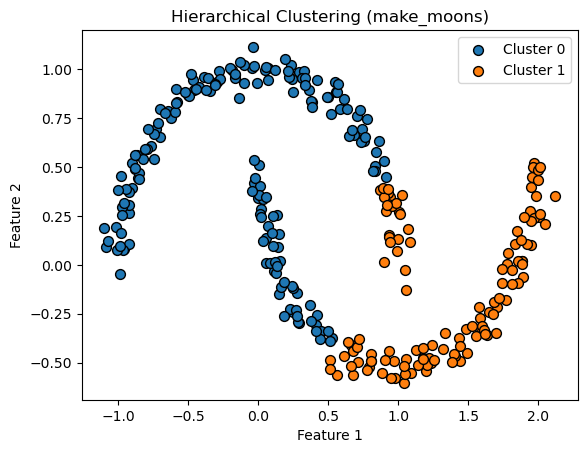

c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


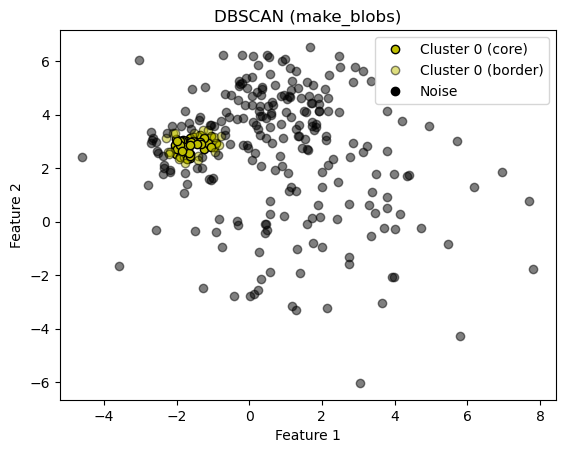

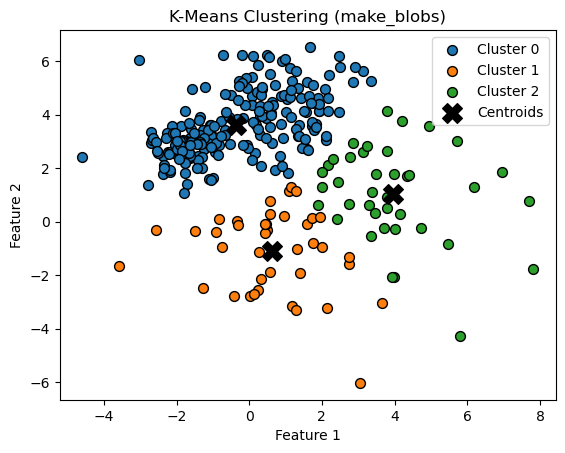

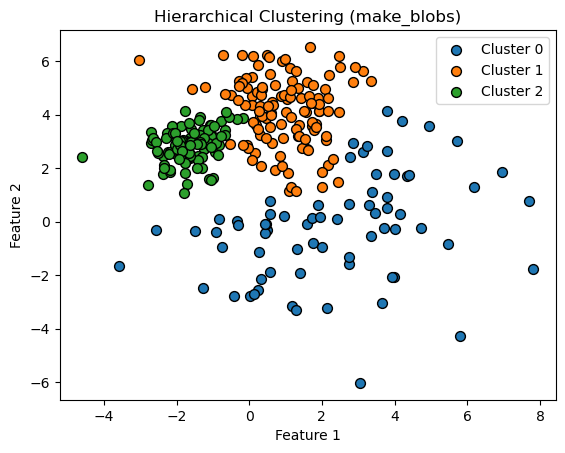

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs, make_circles

######## Dataset where DBSCAN excels (make_moons)

# Load data in X
X, y_true = make_moons(n_samples=300, noise = 0.05, random_state=0)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

# Apply Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_hc = hc.fit_predict(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plotting DBSCAN
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        label_name = 'Noise'
    else:
        label_name = f'Cluster {k}'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=6,
             label=label_name + ' (core)' if k != -1 else label_name)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=6,
             alpha=0.5,
             label=label_name + ' (border)' if k != -1 else None)
    
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN (make_moons)')
plt.legend()
plt.show()

# Plotting K-Means
for i in np.unique(labels_kmeans):
    plt.scatter(X[labels_kmeans == i, 0], X[labels_kmeans == i, 1],
                label=f'Cluster {i}', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plotting Hierarchical clustering
for i in np.unique(labels_hc):
    plt.scatter(X[labels_hc == i, 0], X[labels_hc == i, 1],
                label=f'Cluster {i}', s=50, edgecolor='k')
plt.title("Hierarchical Clustering (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

######## Dataset where DBSCAN struggles (make_blobs)

# Load data in X
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=0)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

# Apply Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hc = hc.fit_predict(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plotting DBSCAN
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        label_name = 'Noise'
    else:
        label_name = f'Cluster {k}'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=6,
             label=label_name + ' (core)' if k != -1 else label_name)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=6,
             alpha=0.5,
             label=label_name + ' (border)' if k != -1 else None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN (make_blobs)')
plt.legend()
plt.show()

# Plotting K-Means
for i in np.unique(labels_kmeans):
    plt.scatter(X[labels_kmeans == i, 0], X[labels_kmeans == i, 1],
                label=f'Cluster {i}', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plotting Hierarchical clustering
for i in np.unique(labels_hc):
    plt.scatter(X[labels_hc == i, 0], X[labels_hc == i, 1],
                label=f'Cluster {i}', s=50, edgecolor='k')
plt.title("Hierarchical Clustering (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()